In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
device = 'cpu'
device

'cpu'

In [3]:
df = pd.read_csv('data/The Lannister Data Chronicles_ Decrypting Diabetes.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

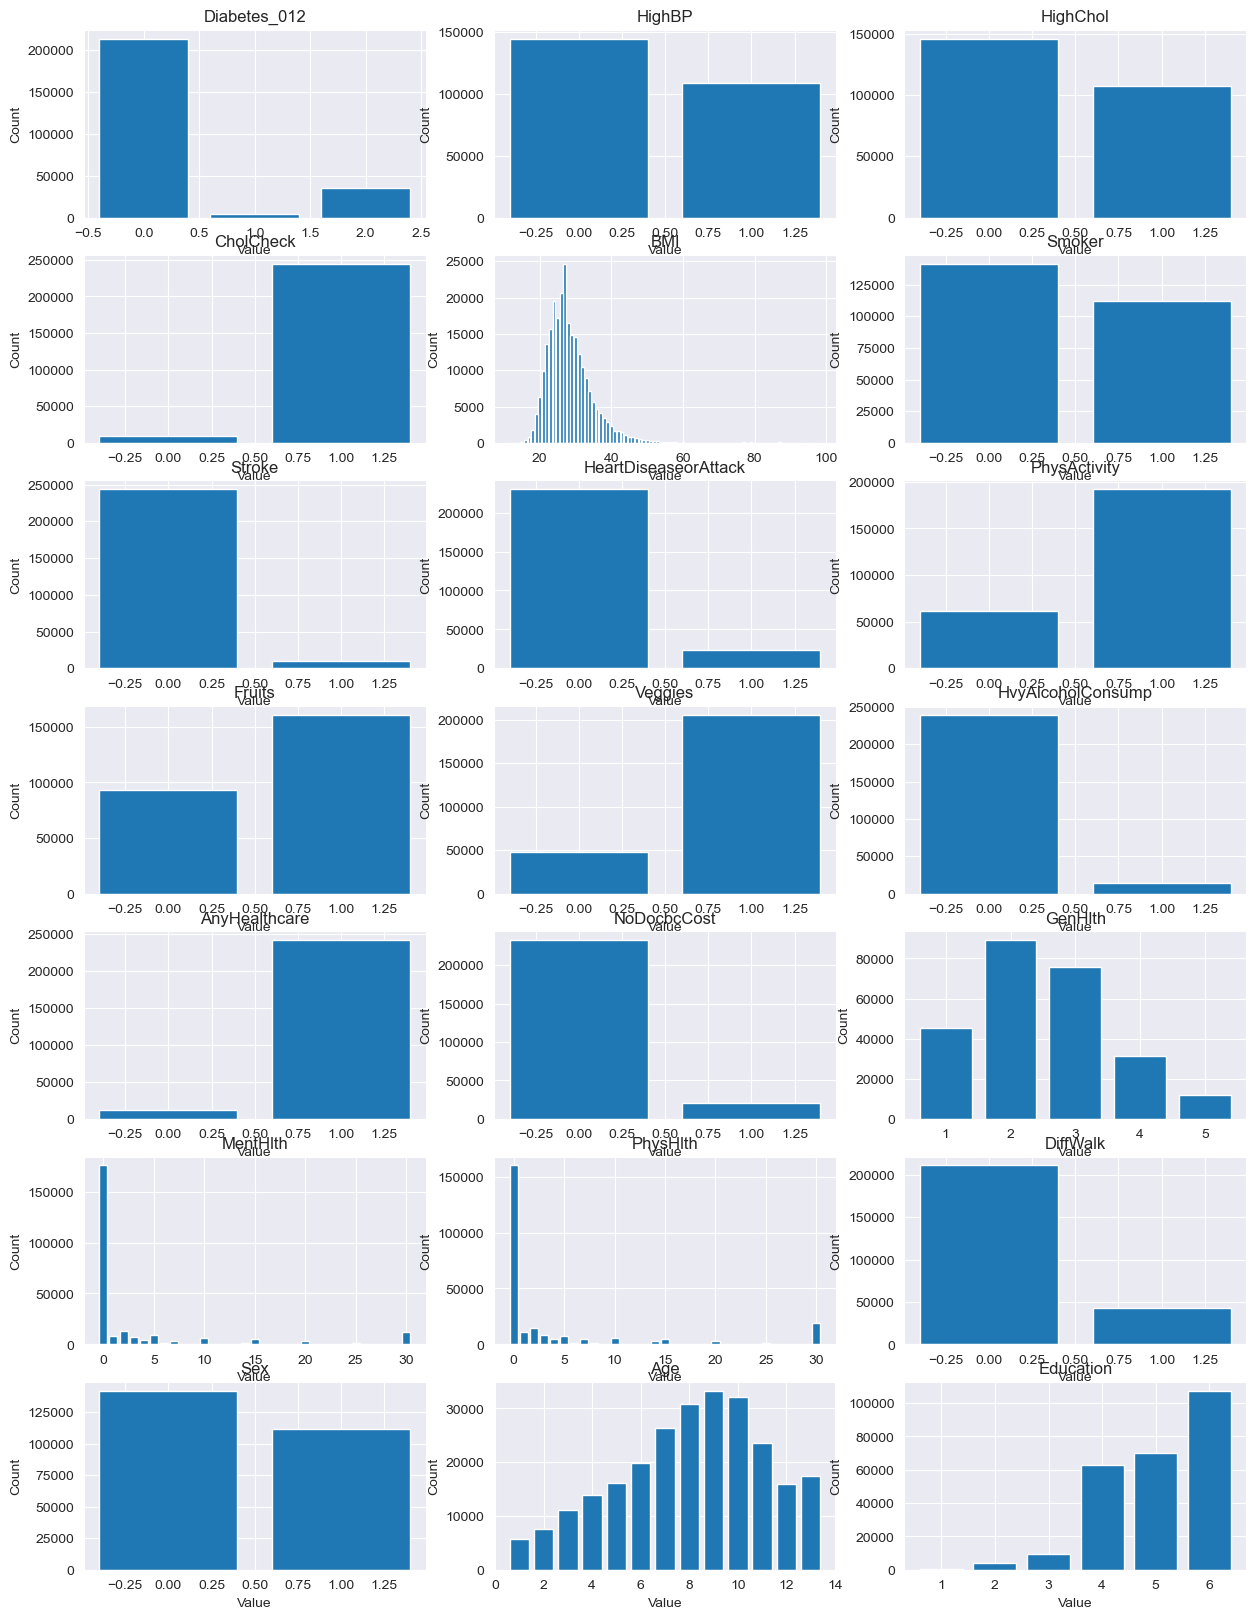

In [5]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))

axes = axes.flatten()

for i, column in enumerate(df.columns[:-1]):
    # Plot the bar plot
    axes[i].bar(df[column].value_counts().index, df[column].value_counts().values)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
# plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 800x600 with 0 Axes>

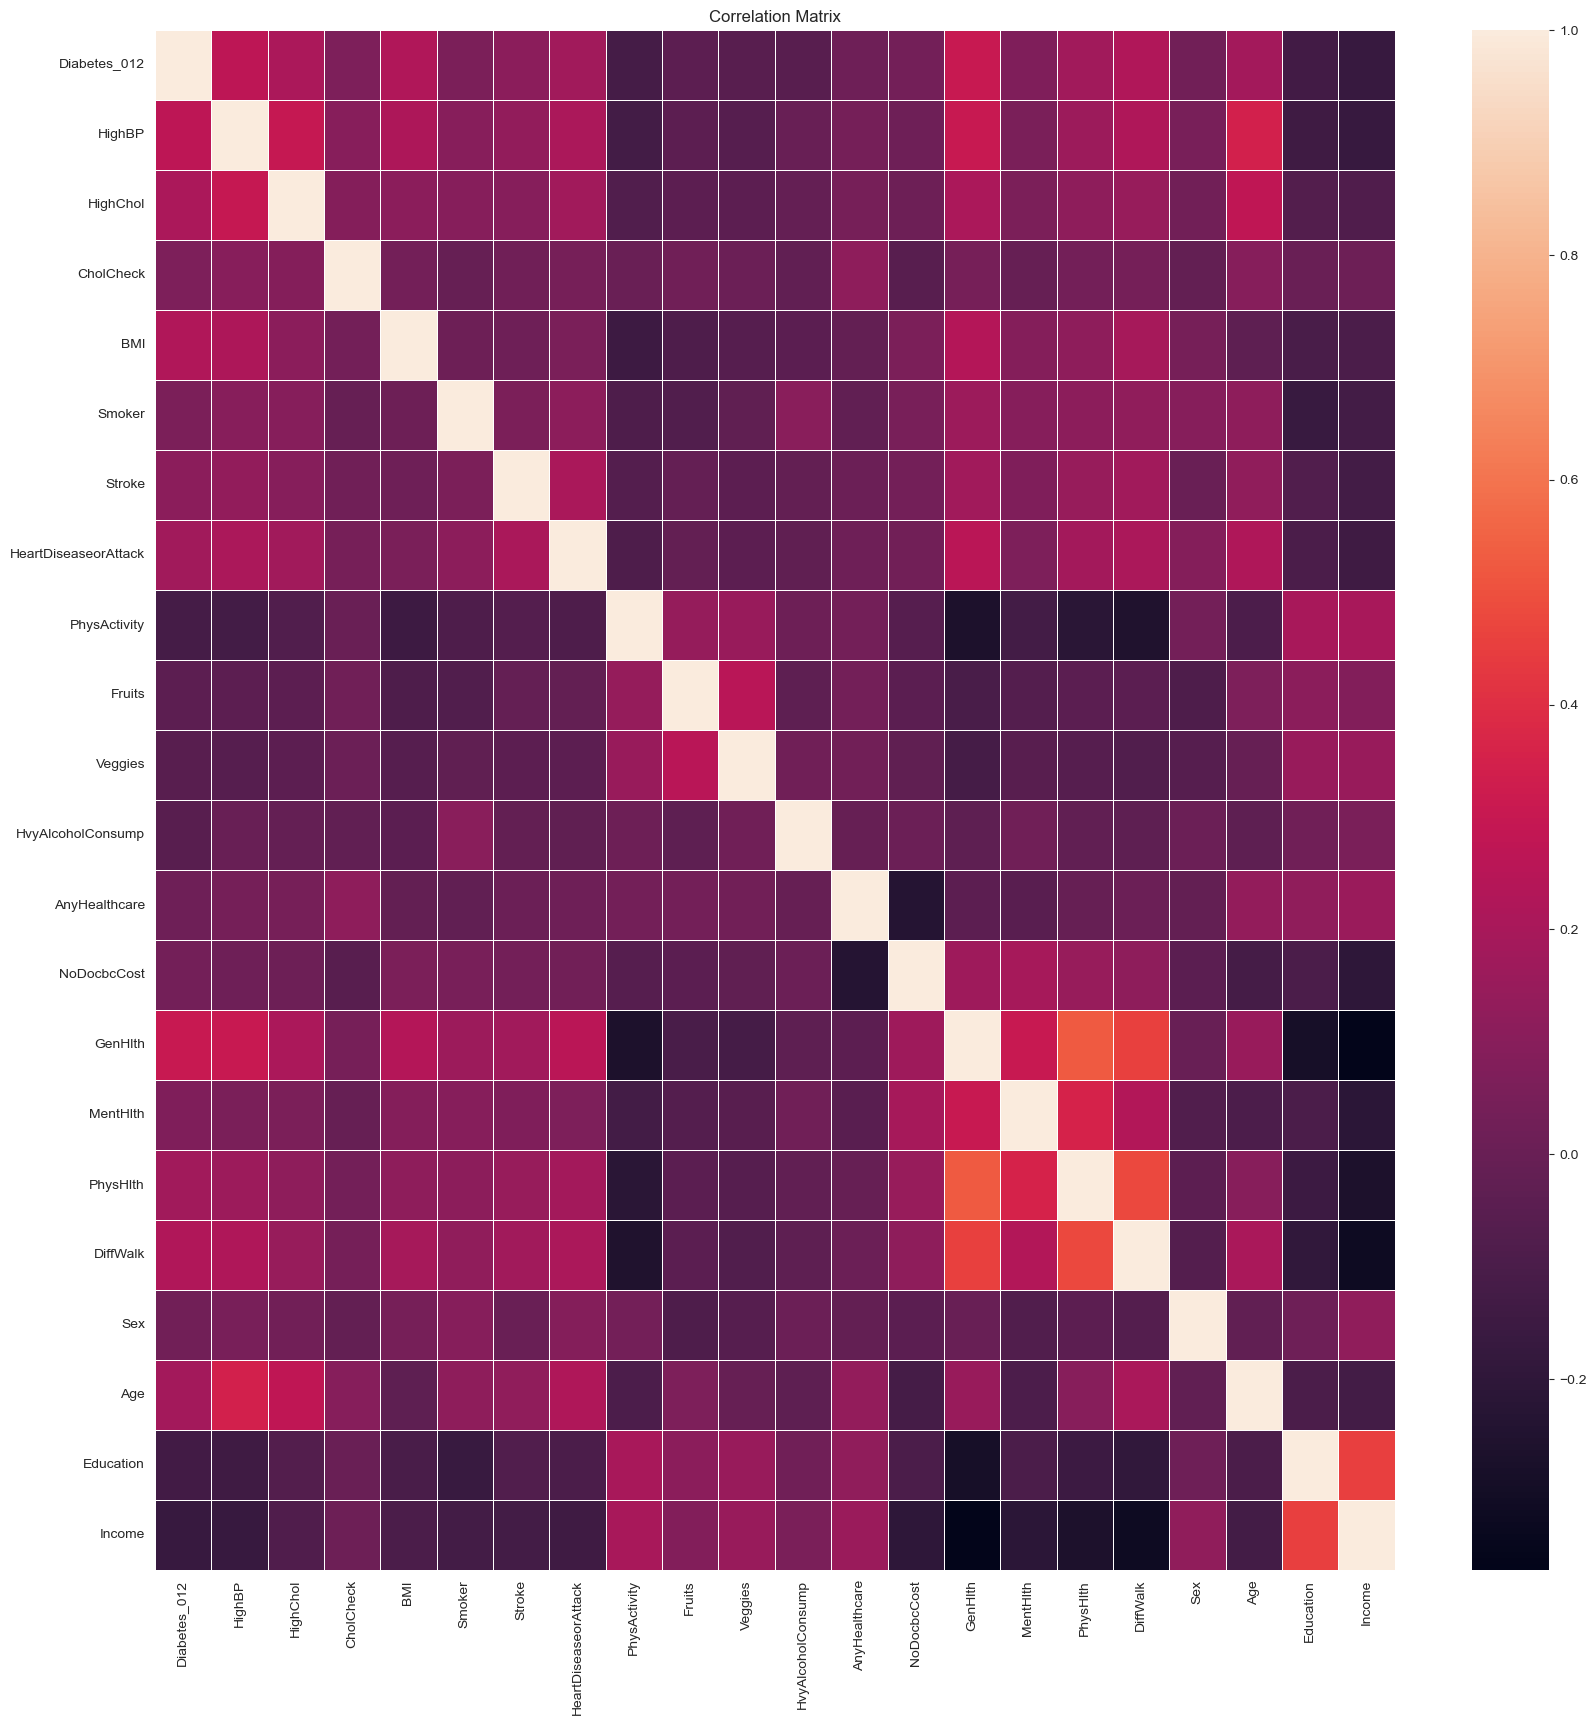

In [6]:
correlation_matrix = df.corr()   

plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=False, linewidths=.7, ax=ax)
plt.title('Correlation Matrix')

In [7]:
df.drop_duplicates(inplace=True)
# df.drop(columns=['Education', 'PhysHlth', 'DiffWalk'], inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          229781 non-null  int64
 1   HighBP                229781 non-null  int64
 2   HighChol              229781 non-null  int64
 3   CholCheck             229781 non-null  int64
 4   BMI                   229781 non-null  int64
 5   Smoker                229781 non-null  int64
 6   Stroke                229781 non-null  int64
 7   HeartDiseaseorAttack  229781 non-null  int64
 8   PhysActivity          229781 non-null  int64
 9   Fruits                229781 non-null  int64
 10  Veggies               229781 non-null  int64
 11  HvyAlcoholConsump     229781 non-null  int64
 12  AnyHealthcare         229781 non-null  int64
 13  NoDocbcCost           229781 non-null  int64
 14  GenHlth               229781 non-null  int64
 15  MentHlth              229781 non-null  

In [9]:
y = df['Diabetes_012']
X = df.drop('Diabetes_012', axis=1)
num_columns = len(X.columns)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32).to(device)
y_train = torch.nn.functional.one_hot(y_train.to(torch.int64), num_classes=3).to(torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32).to(device)
y_test = torch.nn.functional.one_hot(y_test.to(torch.int64), num_classes=3).to(torch.float32)

In [11]:
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=16384, shuffle=True)

In [12]:
for i, (X, y) in enumerate(dataloader):
    print(X[0], y[0])
    break
    

tensor([ 1.,  0.,  1., 33.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  5.,
        10., 30.,  1.,  1.,  9.,  5.,  6.]) tensor([[0., 0., 1.]])


In [13]:
class Network(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(num_columns, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 3),
        )
    
    def forward(self, x):
        return self.model(x)
    

In [14]:
model = Network().to(device)
model.eval()
try:
    model.load_state_dict(torch.load('models/Classifier.pth'))
except:
    pass

In [15]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999))
# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.1)

In [16]:
def train(num_epochs=1000):
    train_loss = []
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, torch.argmax(y_train.squeeze(1), dim=1))
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        scheduler.step()
        print(f'Epoch: {epoch}, Loss: {loss.item()}')
    plt.plot(train_loss)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('Training Loss')
        
def predict():
    outputs = []
    model.eval()
    with torch.no_grad():
        output = model(X_test)
        # print(output)
        outputs.append(output)
    outputs = torch.cat(outputs)
    return outputs

def evaluate():
    model.eval()
    with torch.no_grad():
        output = model(X_test)
        loss = criterion(output, y_test.squeeze(1))
        predicted = torch.argmax(output, dim=1)
        actual = torch.argmax(y_test.squeeze(1), dim=1)
        correct = (predicted == actual).sum().item()
        total = y_test.size()[0]
        accuracy = correct / total
        print(f'Loss: {loss.item()}, Accuracy: {accuracy}')

Epoch: 0, Loss: 2.0177507400512695
Epoch: 1, Loss: 1.255560278892517
Epoch: 2, Loss: 1.151060700416565
Epoch: 3, Loss: 0.9068490862846375
Epoch: 4, Loss: 0.6978802680969238
Epoch: 5, Loss: 0.6152618527412415
Epoch: 6, Loss: 0.5809426307678223
Epoch: 7, Loss: 0.5998478531837463
Epoch: 8, Loss: 0.5957944989204407
Epoch: 9, Loss: 0.5815131068229675
Epoch: 10, Loss: 0.5490826964378357
Epoch: 11, Loss: 0.5246484279632568
Epoch: 12, Loss: 0.5104463696479797
Epoch: 13, Loss: 0.5081508159637451
Epoch: 14, Loss: 0.5068774223327637
Epoch: 15, Loss: 0.5054528713226318
Epoch: 16, Loss: 0.49964457750320435
Epoch: 17, Loss: 0.5000773668289185
Epoch: 18, Loss: 0.4943821132183075
Epoch: 19, Loss: 0.4907523989677429
Epoch: 20, Loss: 0.4841253161430359
Epoch: 21, Loss: 0.4835815727710724
Epoch: 22, Loss: 0.4797808825969696
Epoch: 23, Loss: 0.4772670269012451
Epoch: 24, Loss: 0.4735488295555115
Epoch: 25, Loss: 0.47305378317832947
Epoch: 26, Loss: 0.4704916775226593
Epoch: 27, Loss: 0.46948525309562683
E

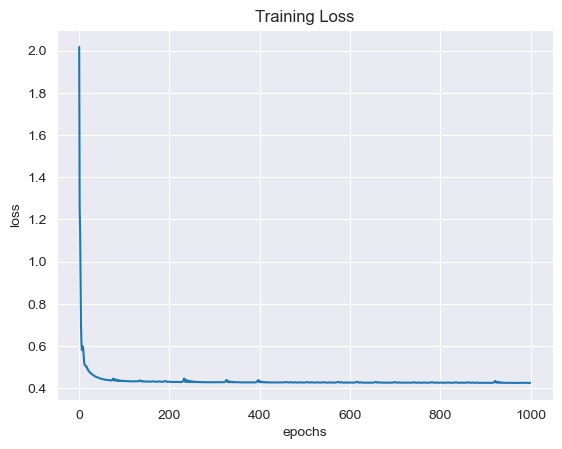

In [17]:
train()
torch.save(model.state_dict(), 'models/Classifier.pth')

In [18]:
predictions = predict()

In [19]:
evaluate()

Loss: 0.4242161810398102, Accuracy: 0.8354984006788955


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train.cpu().numpy(), y_train.squeeze(1).cpu().numpy())

DecisionTreeClassifier()

In [22]:
y_pred = clf.predict(X_test.cpu().numpy())

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test.squeeze(1).cpu().numpy(), y_pred)

0.7339251909393564

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf_rf = RandomForestClassifier()

In [27]:
clf_rf.fit(X_train.cpu().numpy(), y_train.squeeze(1).cpu().numpy())

RandomForestClassifier()

In [28]:
y_pred = clf_rf.predict(X_test.cpu().numpy())

In [29]:
accuracy_score(y_test.squeeze(1).cpu().numpy(), y_pred)

0.8123680832082164

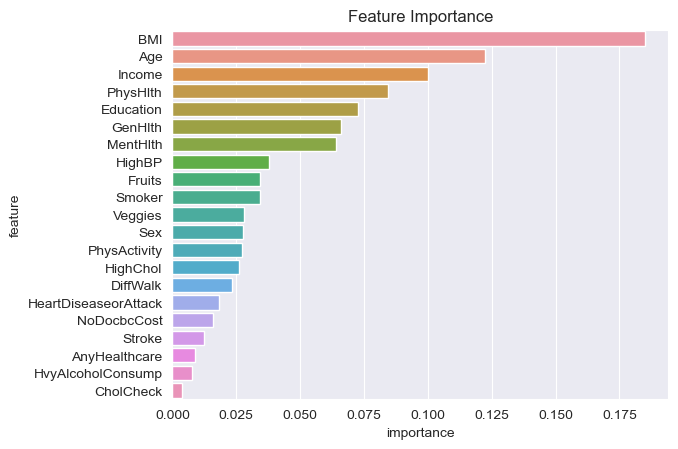

In [30]:
df = pd.read_csv('data/The Lannister Data Chronicles_ Decrypting Diabetes.csv')
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']
importances = clf_rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

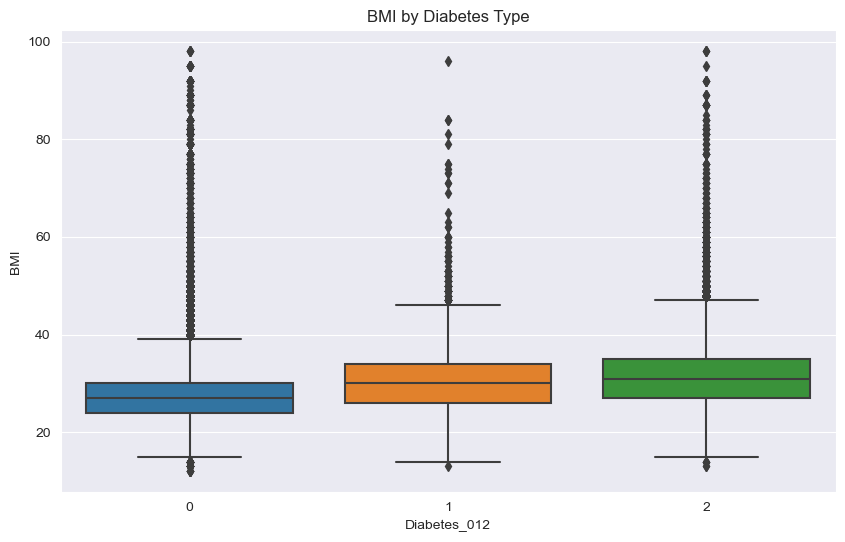

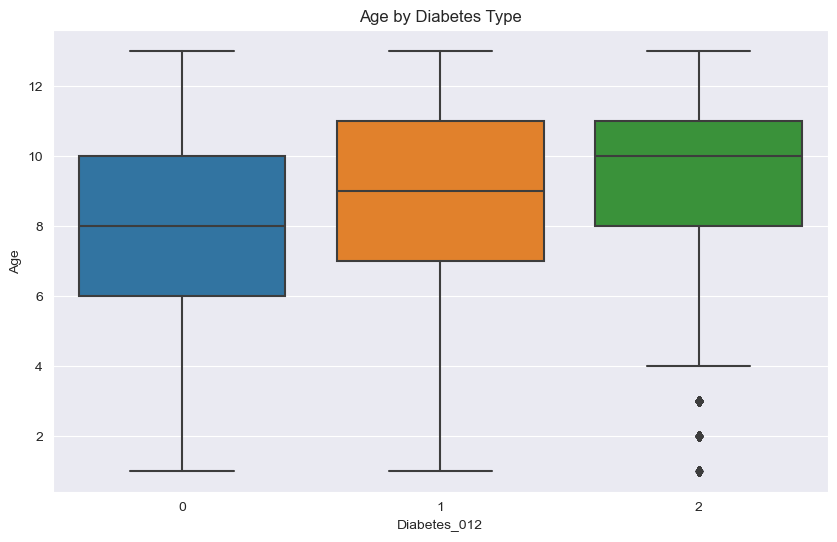

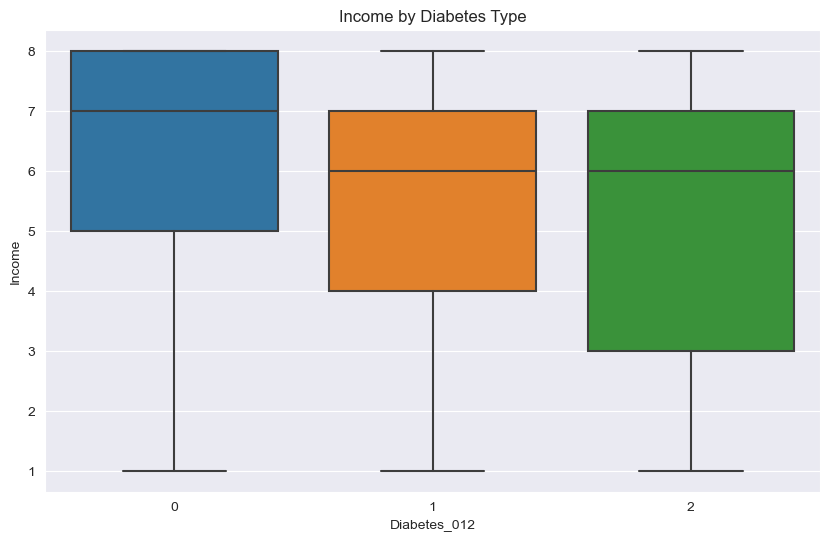

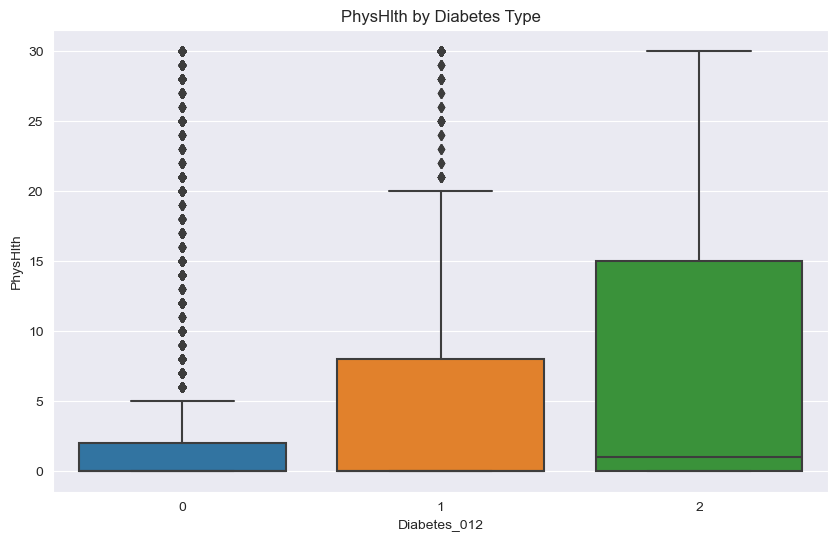

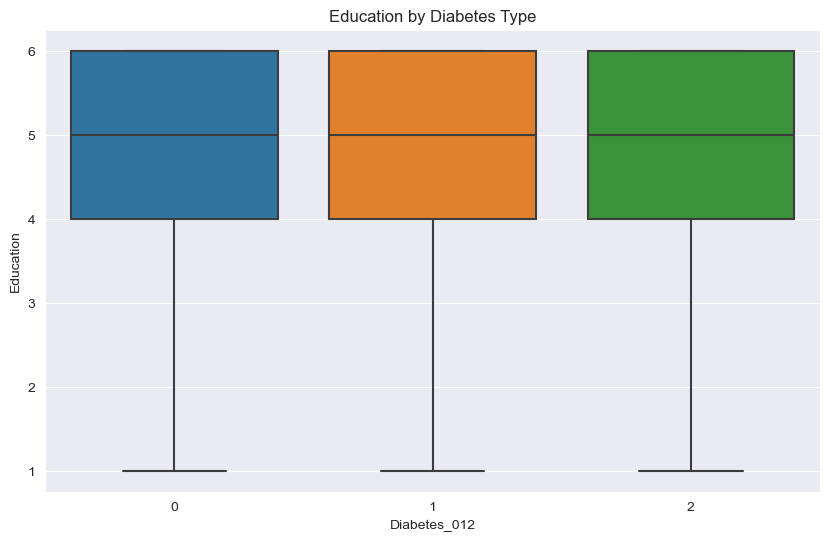

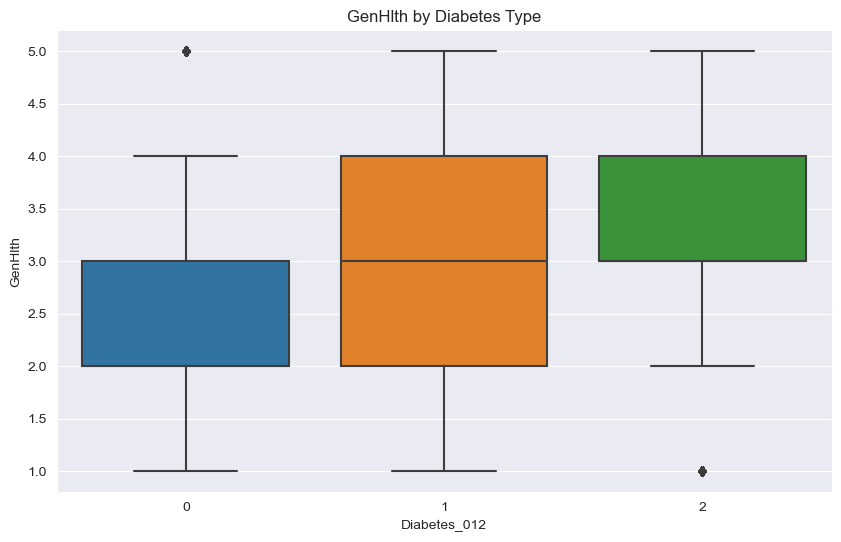

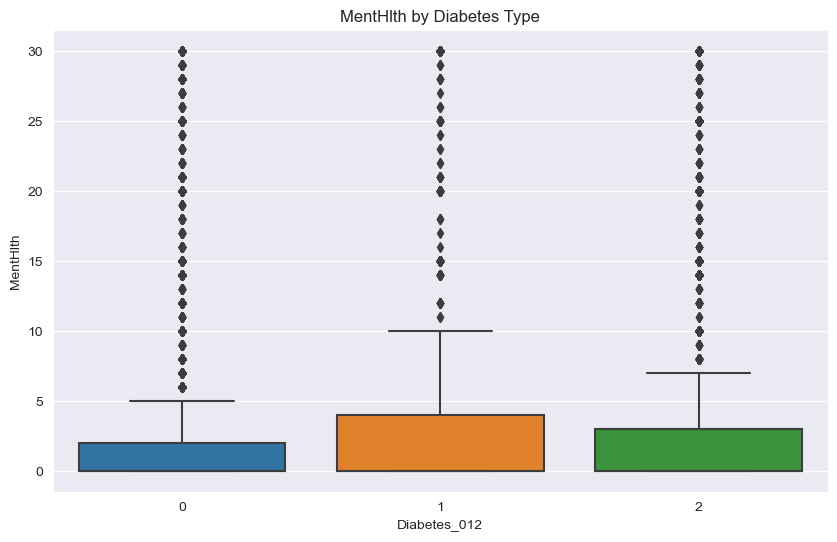

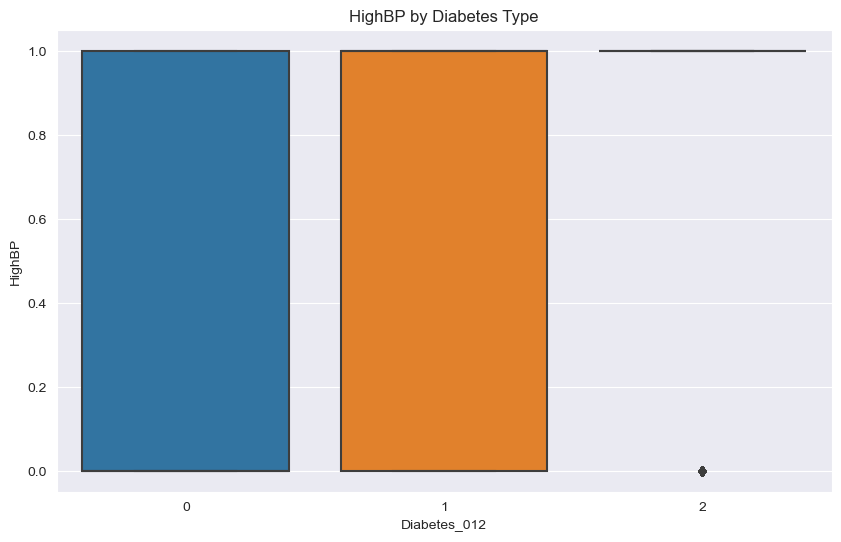

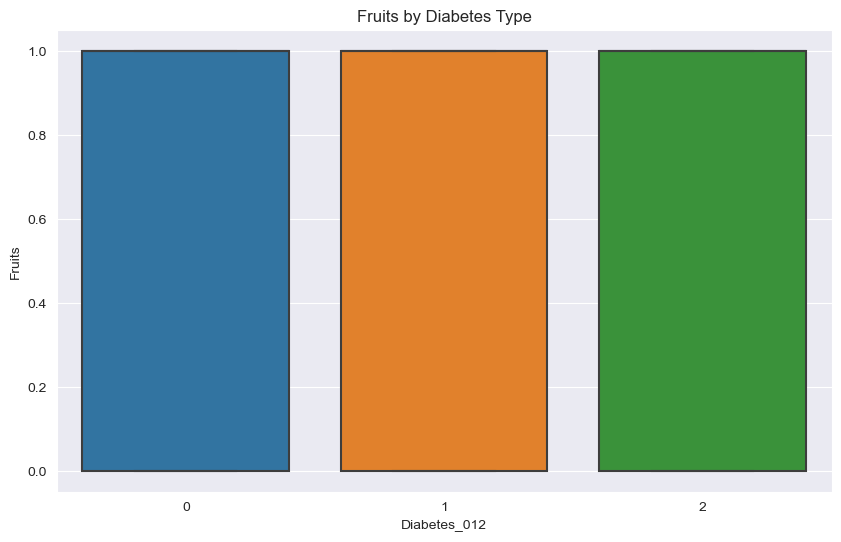

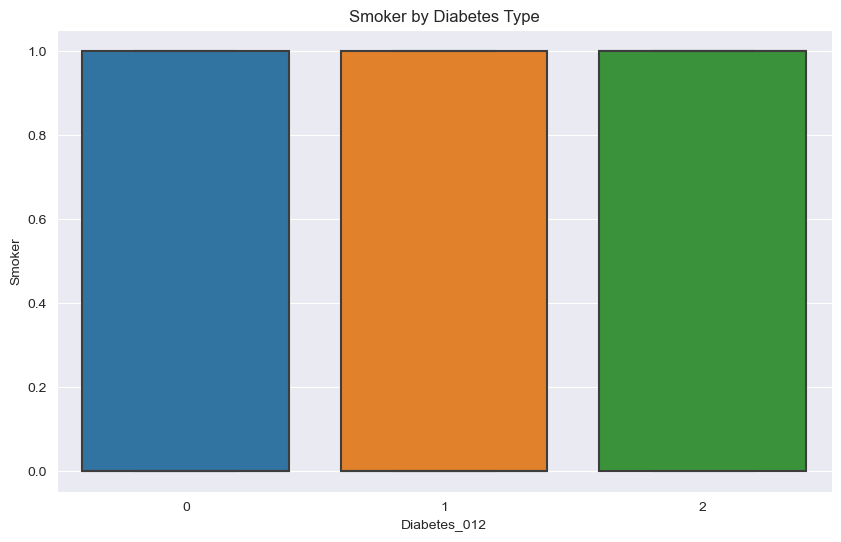

In [32]:
important_features = feature_importance_df.head(10)['feature'].tolist()

for feature in important_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Diabetes_012', y=feature, data=df)
    plt.title(f'{feature} by Diabetes Type')
    plt.show()